In [5]:
import os
from collections import OrderedDict
import time
import numpy as np

from tvb.basic.profile import TvbProfile
TvbProfile.set_profile(TvbProfile.LIBRARY_PROFILE)

from tvb_multiscale.tvb_annarchy.config import *

work_path = os.getcwd()
data_path = os.path.join(work_path.split("tvb_annarchy")[0], "data")
fit_data_path = os.path.join(data_path, "ANNarchyFittedModels/dataFits_2020_02_05/databestfits", )
data_mode = "patient" # "control", "patient"
control_data = os.path.join(fit_data_path, "controlleft/OutputSim_Patient08.mat")
patient_data = os.path.join(fit_data_path, "patientleft/OutputSim_Patient09.mat")
if data_mode == "patient":
    subject_data = patient_data
    global_coupling_scaling = 0.3
    dSN_factor = 0.6 # p5: 0.7, p10: 0.65, p9: 0.6
    iSN_factor = 0.6 # p5: 0.5,  p10: 0.55, p9: 0.6
else:
    subject_data = control_data
    global_coupling_scaling = 0.3
    dSN_factor = 0.55
    iSN_factor = 0.55
    
simulation_length = 1500.0
transient = 500.0
start_stimulus = 400.0
init_cond_jitter = 0.0

simulation_mode = "rs" # "stim" # "rs"
stim_target = "STN"    #    "STN",         "GPi"
stim_mode = "mono"       # "bi"  | "mono" | "simple"
                       # -------------------------
stim_freq = 120.0      # 130.0 |  120.0 |    0.0 
stim_ampl =  -35.0      #  20.0 |  -35.0 |  -10.0 
stim_duration = 0.3    #   0.3 |    0.3 |    0.0
if simulation_mode == "stim":
    simulation_mode = simulation_mode + "_%s_%s" % (stim_target, stim_mode)

outputs_path = os.path.join(work_path, "outputs/outputs_Izhikevich_annarchy")
sim_mode_path = os.path.join(outputs_path, "TVBcortex", data_mode, simulation_mode)
config = Config(output_base=sim_mode_path)
config.figures.SHOW_FLAG = True 
config.figures.SAVE_FLAG = True
config.figures.FIG_FORMAT = 'eps'
config.figures.DEFAULT_SIZE= config.figures.NOTEBOOK_SIZE
FIGSIZE = config.figures.DEFAULT_SIZE

from tvb_multiscale.core.plot.plotter import Plotter
plotter = Plotter(config.figures)

# For interactive plotting:
# %matplotlib notebook  

# Otherwise:
%matplotlib inline 

In [6]:
from scipy.io import loadmat, savemat
from pandas import Series
from xarray import DataArray, concat

def read_xarray_from_dict_mat(ts):
    ndims = len(ts["coords"].item())
    dims = []
    coords = {}
    for idim in range(ndims):
        dim = ts["coords"].item()[idim].item()[0][0].rstrip()
        dims_coords = ts["coords"].item()[idim].item()[2]
        try:
            # For string labels:
            coords[dim] = [label.item().rstrip() for label in dims_coords]
        except: 
            # For time:
            coords[dim] = dims_coords.squeeze()
    dims = []
    for dim in ts["dims"]:
        dims.append(dim.item().rstrip())
    return DataArray(ts["data"], dims=dims, coords=coords, name=ts.get("name", np.array("").item()))
        


In [3]:
# basefolder = os.path.join(os.path.dirname(config.out.FOLDER_RES), "paper10reps")
# ts = []
# for ii in range(10):
#     folder = os.path.join(basefolder, "SimRep_%02d" % ii)
#     ts_dict_mat = loadmat(os.path.join(folder, "res/tvb_timeseries.mat"))
#     ts.append(read_xarray_from_dict_mat(ts_dict_mat))
# allts = concat(ts, dim="Repetitions")
# print("10 repetitions time series:\n%s" % str(allts))
# meants = allts.mean(dim="Repetitions")
# print("mean of 10 repetitions time series:\n%s" % str(meants))  
# savemat(os.path.join(basefolder, "mean_tvb_timeseries.mat"), meants.to_dict())

In [4]:
# spikes_sync = Series()
# for m in ["sync", "distance", "isi_distance"]:
#     measure = "spikes_%s_time_series" % m
#     dict_mat = loadmat(os.path.join(config.out.FOLDER_RES, "%s.mat" % measure))
#     array = read_xarray_from_dict_mat(dict_mat)
#     mean = "%s_mean" % m
#     spikes_sync[mean] = array.mean(dim="Time") 
#     std = "%s_std" % m
#     spikes_sync[std] = array.std(dim="Time") 
#     print("---------------------------------")
#     print("Spikes' %s:" % m)
#     for pop in spikes_sync[mean].coords["Population"]:
#         for reg in spikes_sync[mean].coords["Region"]:
#             if not np.isnan(spikes_sync[mean].loc[pop, reg]):
#                 print("%s - %s: %g (%g)" % (pop.values.item().split("_spikes")[0], reg.values.item(), 
#                                             spikes_sync[mean].loc[pop, reg].values.item(),
#                                             spikes_sync[std].loc[pop, reg].values.item()))
#     print("---------------------------------")
# savemat(os.path.join(config.out.FOLDER_RES, "average_spikes_sync_measures.mat"), spikes_sync.to_dict())


---------------------------------
Spikes' sync:
E - STN_Left: 0.759129 (0.166688)
E - Thal_Left: 0.537436 (0.290492)
I - GPe_Left: 0.81307 (0.205366)
I - GPi_Left: 0.793115 (0.131717)
IdSN - Striatum_Left: 0.730632 (0.15846)
IiSN - Striatum_Left: 0.621278 (0.173818)
---------------------------------
---------------------------------
Spikes' distance:
E - STN_Left: 0.196265 (0.0253593)
E - Thal_Left: 0.172929 (0.0599708)
I - GPe_Left: 0.101471 (0.0525046)
I - GPi_Left: 0.217463 (0.0213839)
IdSN - Striatum_Left: 0.233324 (0.0126709)
IiSN - Striatum_Left: 0.248461 (0.018968)
---------------------------------
---------------------------------
Spikes' isi_distance:
E - STN_Left: 0.209175 (0.0470831)
E - Thal_Left: 0.341119 (0.0778383)
I - GPe_Left: 0.158374 (0.0870478)
I - GPi_Left: 0.176583 (0.0317063)
IdSN - Striatum_Left: 0.212192 (0.0342738)
IiSN - Striatum_Left: 0.361275 (0.0339991)
---------------------------------


/home/docker/env/neurosci/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.
/home/docker/env/neurosci/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/home/docker/env/neurosci/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/home/docker/env/neurosci/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


In [8]:
ts_dict_mat = loadmat(os.path.join(config.out.FOLDER_RES, "tvb_timeseries.mat"))
ts = read_xarray_from_dict_mat(ts_dict_mat)

In [10]:
ts.rename({'Time': 'Time (ms)'})


<xarray.DataArray array(['Region Time Series'], dtype='<U18') (Time (ms): 15000, State Variable: 5, Region: 57, Neurons: 1)>
array([[[[9.24158645e-02],
         [8.96056728e-02],
         [4.89930394e-02],
         ...,
         [1.01463449e-01],
         [1.55864629e-02],
         [5.87542230e-02]],

        [[1.71684241e+00],
         [1.73930070e+00],
         [1.80429717e+00],
         ...,
         [0.00000000e+00],
         [2.69357687e-04],
         [1.10159536e-02]],

        [[1.31146622e+00],
         [1.31892330e+00],
         [1.34228813e+00],
         ...,
...
         ...,
         [4.84170360e-01],
         [7.85137735e-01],
         [3.12474663e+00]],

        [[0.00000000e+00],
         [0.00000000e+00],
         [0.00000000e+00],
         ...,
         [0.00000000e+00],
         [0.00000000e+00],
         [0.00000000e+00]],

        [[3.65689513e-01],
         [3.14399327e-01],
         [6.20553558e-01],
         ...,
         [3.03771716e-01],
         [3.19192159e-01],
         [3.68258906e-01]]]])
Coordinates:
  * State Variable  (State Variable) <U4 'S' 'Rint' 'R' 'Rin' 'I'
  * Region          (Region) <U20 'GPe_Left' 'GPi_Left' ... 'Cerebelum_10_L'
  * Time (ms)       (Time (ms)) float64 0.0 0.1 0.2 ... 1.5e+03 1.5e+03 1.5e+03
Dimensions without coordinates: Neurons

<xarray.DataArray array(['Region Time Series'], dtype='<U18') (Time: 15000, Region: 57, Neurons: 1)>
array([[[1.31146622],
        [1.3189233 ],
        [1.34228813],
        ...,
        [0.87534525],
        [0.46751659],
        [0.68300718]],

       [[1.31028333],
        [1.3188255 ],
        [1.34324129],
        ...,
        [0.90425823],
        [0.48244216],
        [0.66442731]],

       [[1.30823539],
        [1.31803552],
        [1.34313763],
        ...,
...
        ...,
        [0.48211818],
        [0.79909639],
        [2.97798583]],

       [[1.31247492],
        [1.23841369],
        [1.25986056],
        ...,
        [0.49548261],
        [0.80283428],
        [3.14578634]],

       [[1.31360884],
        [1.23859322],
        [1.25854905],
        ...,
        [0.48417036],
        [0.78513773],
        [3.12474663]]])
Coordinates:
    State Variable  <U4 'R'
  * Region          (Region) <U20 'GPe_Left' 'GPi_Left' ... 'Cerebelum_10_L'
  * Time            (Time) float64 0.0 0.1 0.2 0.3 ... 1.5e+03 1.5e+03 1.5e+03
Dimensions without coordinates: Neurons

## 1. Load structural data <br> (minimally a TVB connectivity)  <br> & prepare TVB simulator  <br> (region mean field model, integrator, monitors etc)

In [12]:
from tvb.simulator.models.reduced_wong_wang_exc_io import ReducedWongWangExcIO

# ----------------------------------------------------------------------------------------------------------------
# ----Uncomment below to modify the simulator by changing the default options:--------------------------------------
# ----------------------------------------------------------------------------------------------------------------

from tvb.datatypes.connectivity import Connectivity
from tvb.simulator.cosimulator import CoSimulator
from tvb.simulator.integrators import HeunStochastic
from tvb.simulator.monitors import Raw  # , Bold, EEG


# 0. GPe_Left, 1. GPi_Left, 2. STN_Left, 3. Striatum_Left, 4. Thal_Left
BG_opt_matrix_weights = np.zeros((5, 5))
conn_mode = "subject" # "average"
if conn_mode == "average":
    weights_maith = np.array([1.93, 3.56, 1.46, 4.51, 3.52, 2.30, 2.34, 3.78, 1.98, 
                             1.30, 1.82, 3.56, 3.02, 1.78, 1.36, 2.27, 4.13, 2.74, 3.27])*1e-3  # controls
#     weights_maith = np.array([3.27, 3.80, 2.65, 3.66, 3.06, 3.06, 3.25, 4.02, 3.32, 
#                             2.98, 3.45, 3.64, 2.50, 2.12, 2.86, 2.79, 3.96, 3.69, 3.87])*1e-3   # patients
    # probs_maith = ????
else:
    import scipy.io as sio
    conn_path = os.path.join(data_path, "basal_ganglia_conn_incl_cortex")
    weights=sio.loadmat(subject_data)    # weights start from index 19
    weights_maith = weights["X"][0, 19:] # these are indices 19 till 37
    probs_maith = weights["X"][0, :19]   # these are indices 0 till 18

wdSNGPi = BG_opt_matrix_weights[3, 1] = weights_maith[0]
wiSNGPe = BG_opt_matrix_weights[3, 0] = weights_maith[1]
wGPeSTN = BG_opt_matrix_weights[0, 2] = weights_maith[2]
wSTNGPe = BG_opt_matrix_weights[2, 0] = weights_maith[3]
wSTNGPi = BG_opt_matrix_weights[2, 1] = weights_maith[4]
wGPeGPi = BG_opt_matrix_weights[0, 1] = weights_maith[5]  
wGPiTh = BG_opt_matrix_weights[1, 4] = weights_maith[8]
wThdSN = BG_opt_matrix_weights[4, 3] = weights_maith[10] # Th -> dSN
    
sliceBGnet = slice(0,5)

wGPeGPe = weights_maith[6]   # "GPe" -> "GPe" 
wGPiGPi = weights_maith[7]   # "GPi" -> "GPi" 
wThiSN = weights_maith[9]    # "Eth" -> "IiSN" 

wdSNdSN = weights_maith[11]  # "IdSN" -> "IdSN" 
wiSNiSN = weights_maith[12]  # "IiSN" -> "IiSN" 
wCtxdSN = weights_maith[13]  # "CxE" -> "IdSN" 
wCtxiSN = weights_maith[14] # "CxE" -> "IiSN" 
wCtxSTN = weights_maith[15]  # "CxE" -> "Estn"
wCtxEtoI = weights_maith[16] # "CxE" -> "CxI"
wCtxItoE = weights_maith[17] # "CxI" -> "CxE"
wCtxItoI = weights_maith[18] # "CxI" -> "CxI"

pdSNGPi = probs_maith[0]
piSNGPe = probs_maith[1]
pGPeSTN = probs_maith[2]
pSTNGPe = probs_maith[3]
pSTNGPi = probs_maith[4]
pGPeGPi = probs_maith[5]  
pGPeGPe = probs_maith[6]  # "GPe" -> "GPe" 
pGPiGPi = probs_maith[7]  # "GPi" -> "GPi" 
pGPiTh = probs_maith[8]
pThiSN =  probs_maith[9]  # "Eth" -> "IiSN
pThdSN = probs_maith[10] # Th --> dSN
pdSNdSN = probs_maith[11] # "IdSN" -> "IdSN" 
piSNiSN = probs_maith[12] # "IiSN" -> "IiSN" 
pCtxdSN = probs_maith[13]  # "CxE" -> "IdSN" 
pCtxiSN = probs_maith[14] # "CxE" -> "IiSN" 
pCtxSTN = probs_maith[15]  # "CxE" -> "Estn"
pCtxEtoI = probs_maith[16] # "CxE" -> "CxI"
pCtxItoE = probs_maith[17] # "CxI" -> "CxE"
pCtxItoI = probs_maith[18] # "CxI" -> "CxI"
pCtxCtx = probs_maith[16:19].mean() # "Ctx" -> "Ctx"

loadedParams ={'dSNGPi_probs': probs_maith[0],
    	'dSNGPi_weights'  : weights_maith[0],
    	'iSNGPe_probs'   : probs_maith[1],
    	'iSNGPe_weights'  : weights_maith[1],
    	'GPeSTN_probs'   : probs_maith[2],
    	'GPeSTN_weights'  : weights_maith[2],
    	'STNGPe_probs'   : probs_maith[3],
    	'STNGPe_weights'  : weights_maith[3],
    	'STNGPi_probs'   : probs_maith[4],
    	'STNGPi_weights' : weights_maith[4],
    	'GPeGPi_probs'   : probs_maith[5],
    	'GPeGPi_weights'  : weights_maith[5],
    	'GPeGPe_probs'   : probs_maith[6],
    	'GPeGPe_weights'  : weights_maith[6],
    	'GPiGPi_probs'   : probs_maith[7],
    	'GPiGPi_weights'  : weights_maith[7],
    	'GPiThal_probs'   : probs_maith[8],
    	'GPiThal_weights'  : weights_maith[8],
    	'ThaliSN_probs'   : probs_maith[9],
    	'ThaliSN_weights'  : weights_maith[9],
    	'ThaldSN_probs'   : probs_maith[10],
    	'ThaldSN_weights'  : weights_maith[10],
    	'dSNdSN_probs'   : probs_maith[11],
    	'dSNdSN_weights'  : weights_maith[11],
    	'iSNiSN_probs'   : probs_maith[12],
    	'iSNiSN_weights'  : weights_maith[12],
    	'CtxdSN_probs'   : probs_maith[13],
    	'CtxdSN_weights'  : weights_maith[13],
    	'CtxiSN_probs'   : probs_maith[14],
    	'CtxiSN_weights'  : weights_maith[14],
    	'CtxSTN_probs'   : probs_maith[15],
    	'CtxSTN_weights'  : weights_maith[15],
    	'CtxECtxI_probs'    : probs_maith[16],
    	'CtxECtxI_weights'  : weights_maith[16],
    	'CtxICtxE_probs'    : probs_maith[17],
    	'CtxICtxE_weights'  : weights_maith[17],
    	'CtxICtxI_probs'   : probs_maith[18],
    	'CtxICtxI_weights'  : weights_maith[18],
        'CtxThal_weights': 0.0,
        'CtxThal_probs': 1.0}
print(loadedParams)

assert_loadedParams = dict(zip(loadedParams.values(), loadedParams.keys()))


{'dSNGPi_probs': 0.17859516634489409, 'dSNGPi_weights': 0.008694033162319101, 'iSNGPe_probs': 0.33518908071564507, 'iSNGPe_weights': 0.008090356577449711, 'GPeSTN_probs': 0.16505628454033283, 'GPeSTN_weights': 0.005997084264236037, 'STNGPe_probs': 0.3962228806747589, 'STNGPe_weights': 0.011259651579748606, 'STNGPi_probs': 0.24895916907698845, 'STNGPi_weights': 0.012728955057755228, 'GPeGPi_probs': 0.3252567500370787, 'GPeGPi_weights': 0.006170218545084936, 'GPeGPe_probs': 0.32325378120003734, 'GPeGPe_weights': 0.006765628813882359, 'GPiGPi_probs': 0.3371743973897537, 'GPiGPi_weights': 0.01216071144597663, 'GPiThal_probs': 0.24578932343574705, 'GPiThal_weights': 0.007014219544362278, 'ThaliSN_probs': 0.13343960522906853, 'ThaliSN_weights': 0.005992356203860255, 'ThaldSN_probs': 0.12055055752571203, 'ThaldSN_weights': 0.012069912539882353, 'dSNdSN_probs': 0.43455099617713133, 'dSNdSN_weights': 0.007630499957085704, 'iSNiSN_probs': 0.22354489027929958, 'iSNiSN_weights': 0.0141184567240998

Connections of Thalami, Pallidum (GPe/i), Putamen and Caudate (Striatum) removed!:
 [[   0.    0. 2642.    0.  781.    0.  200.    0.]
 [   0.    0.    0. 1034.    0.   45.    0. 1025.]
 [2642.    0.    0.    0. 6058.    0. 1337.    0.]
 [   0. 1034.    0.    0.    0.  162.    0.  381.]
 [ 781.    0. 6058.    0.    0.    0. 1026.    0.]
 [   0.   45.    0.  162.    0.    0.    0.  989.]
 [ 200.    0. 1337.    0. 1026.    0.    0.    0.]
 [   0. 1025.    0.  381.    0.  989.    0.    0.]]
Removing BG -> Cortex connections with max:
1931.34115274226
Removing Cortex -> Thalamus connections with summed weight:
7385.840310132234
Removing BG <- Cortex connections with max:
1682.84151027352

Left cortex connectome, after removing direct BG -> Cortex and intehemispheric BG <-> BG connections:


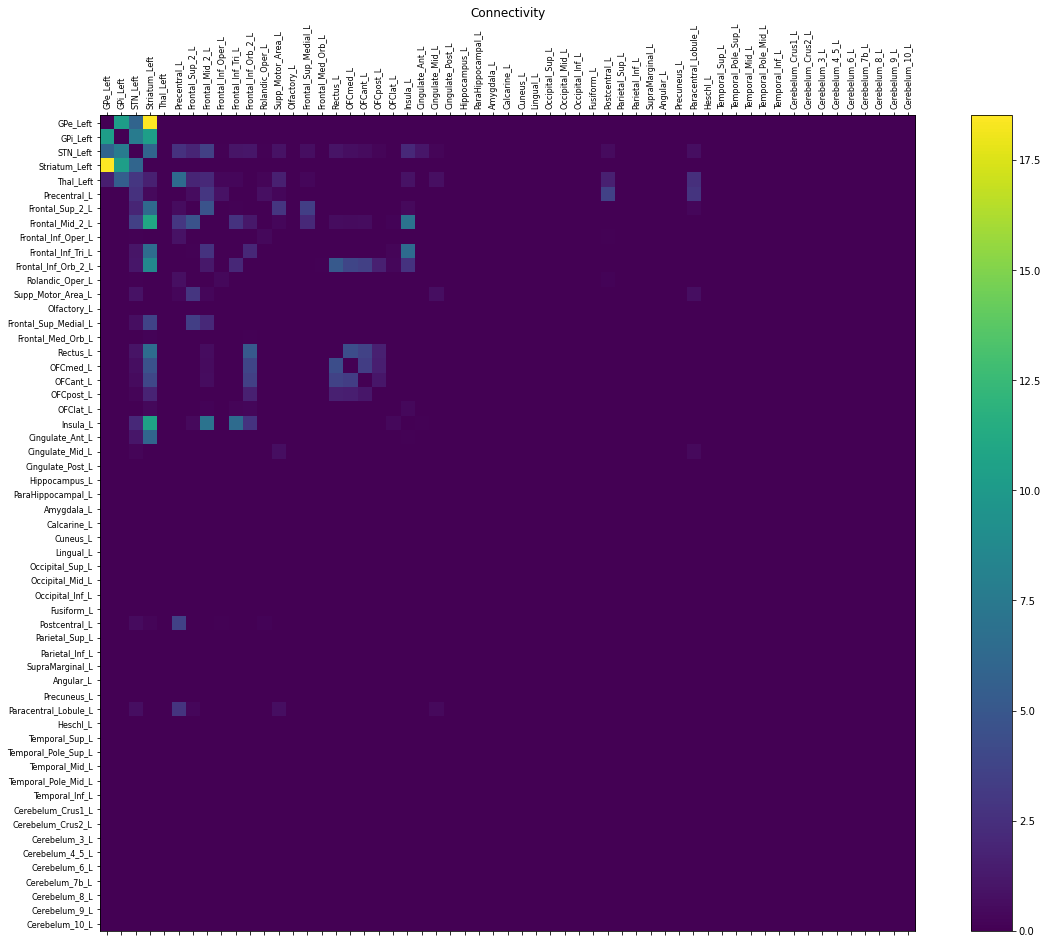

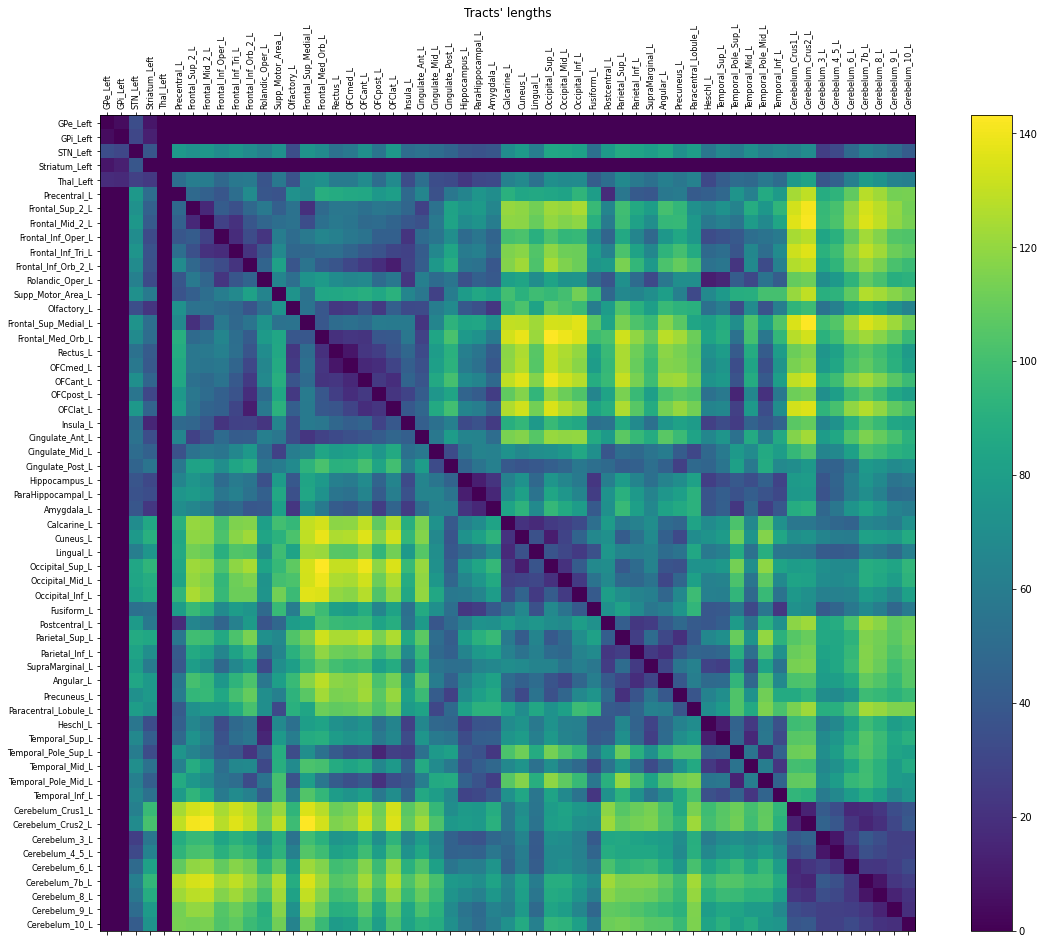

In [13]:
# Load full TVB connectome connectivity

conn_path = os.path.join(data_path, "basal_ganglia_conn")

#Load AAL atlas normative connectome including the Basal Ganglia regions from Petersen et al. atlas
wTVB = np.loadtxt(os.path.join(conn_path, "conn_denis_weights.txt"))
cTVB = np.loadtxt(os.path.join(conn_path, "aal_plus_BG_centers.txt"),usecols=range(1,4))
rlTVB = np.loadtxt(os.path.join(conn_path, "aal_plus_BG_centers.txt"),dtype="str", usecols=(0,))
tlTVB = np.loadtxt(os.path.join(conn_path, "BGplusAAL_tract_lengths.txt"))

# Remove the second Thalamus, Pallidum (GPe/i), Putamen and Caudate (Striatum):
inds_Th = (rlTVB.tolist().index("Thalamus_L"), rlTVB.tolist().index("Thalamus_R"))
inds_Pall = (rlTVB.tolist().index("Pallidum_L"), rlTVB.tolist().index("Pallidum_R"))
inds_Put = (rlTVB.tolist().index("Putamen_L"), rlTVB.tolist().index("Putamen_R"))
inds_Caud = (rlTVB.tolist().index("Caudate_L"), rlTVB.tolist().index("Caudate_R"))
inds_rm = inds_Th + inds_Pall + inds_Put + inds_Caud
print("Connections of Thalami, Pallidum (GPe/i), Putamen and Caudate (Striatum) removed!:\n", 
      wTVB[inds_rm, :][:, inds_rm])
wTVB = np.delete(wTVB, inds_rm, axis=0)
wTVB = np.delete(wTVB, inds_rm, axis=1)
tlTVB = np.delete(tlTVB, inds_rm, axis=0)
tlTVB = np.delete(tlTVB, inds_rm, axis=1)
rlTVB = np.delete(rlTVB, inds_rm, axis=0)
cTVB = np.delete(cTVB, inds_rm, axis=0)

number_of_regions = len(rlTVB)
speed = np.array([4.0])
min_tt = speed.item() * 0.1
sliceBG = [0, 1, 2, 3, 6, 7]
sliceCortex = slice(10, number_of_regions)

# Remove BG -> Cortex connections
print("Removing BG -> Cortex connections with max:")
print(wTVB[sliceBG, :][:, sliceCortex].max())
wTVB[sliceBG, sliceCortex] = 0.0
tlTVB[sliceBG, sliceCortex] = min_tt

# Remove Cortex -> Thalamus connections
sliceThal = [8, 9]
print("Removing Cortex -> Thalamus connections with summed weight:")
print(wTVB[:, 4].sum())
wTVB[:, sliceThal] = 0.0
tlTVB[:, sliceThal] = min_tt

# Remove GPe/i <- Cortex connections
sliceBG = [0, 1, 2, 3]
print("Removing BG <- Cortex connections with max:")
print(wTVB[sliceCortex, :][:, sliceBG].max())
wTVB[sliceCortex, sliceBG] = 0.0
tlTVB[sliceCortex, sliceBG] = min_tt

connTVB = Connectivity(region_labels=rlTVB, weights=wTVB, centres=cTVB, tract_lengths=tlTVB, speed=speed)

# Normalize connectivity weights
connTVB.weights = connTVB.scaled_weights(mode="region")
connTVB.weights /= np.percentile(connTVB.weights, 99)

# Keep only left hemisphere and remove Vermis:
sliceLeft = slice(0, connTVB.number_of_regions -8, 2)

connLeft = Connectivity(region_labels=connTVB.region_labels[sliceLeft], 
                        centres=connTVB.centres[sliceLeft],
                        weights=connTVB.weights[sliceLeft][:, sliceLeft],
                        tract_lengths=connTVB.tract_lengths[sliceLeft][:, sliceLeft], 
                       speed=connTVB.speed)
connLeft.configure()

print("\nLeft cortex connectome, after removing direct BG -> Cortex and intehemispheric BG <-> BG connections:")
plotter.plot_tvb_connectivity(connLeft);



Left BG TVB network:


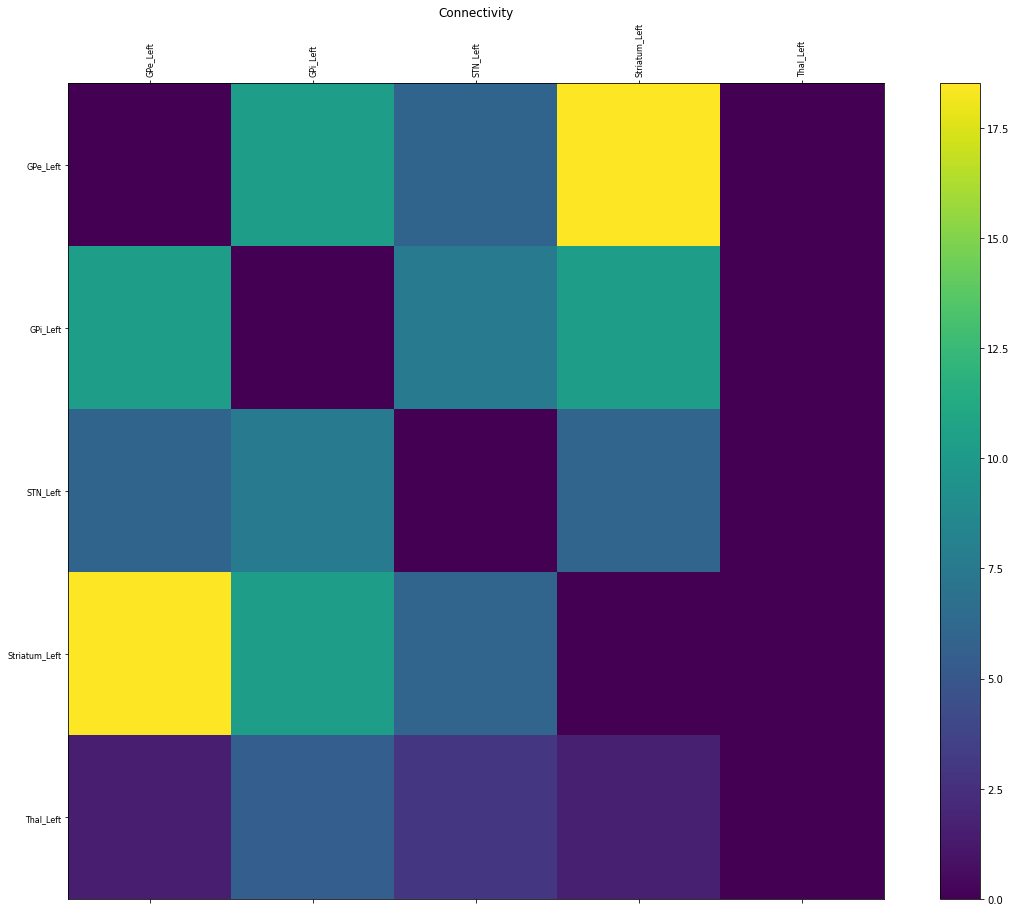

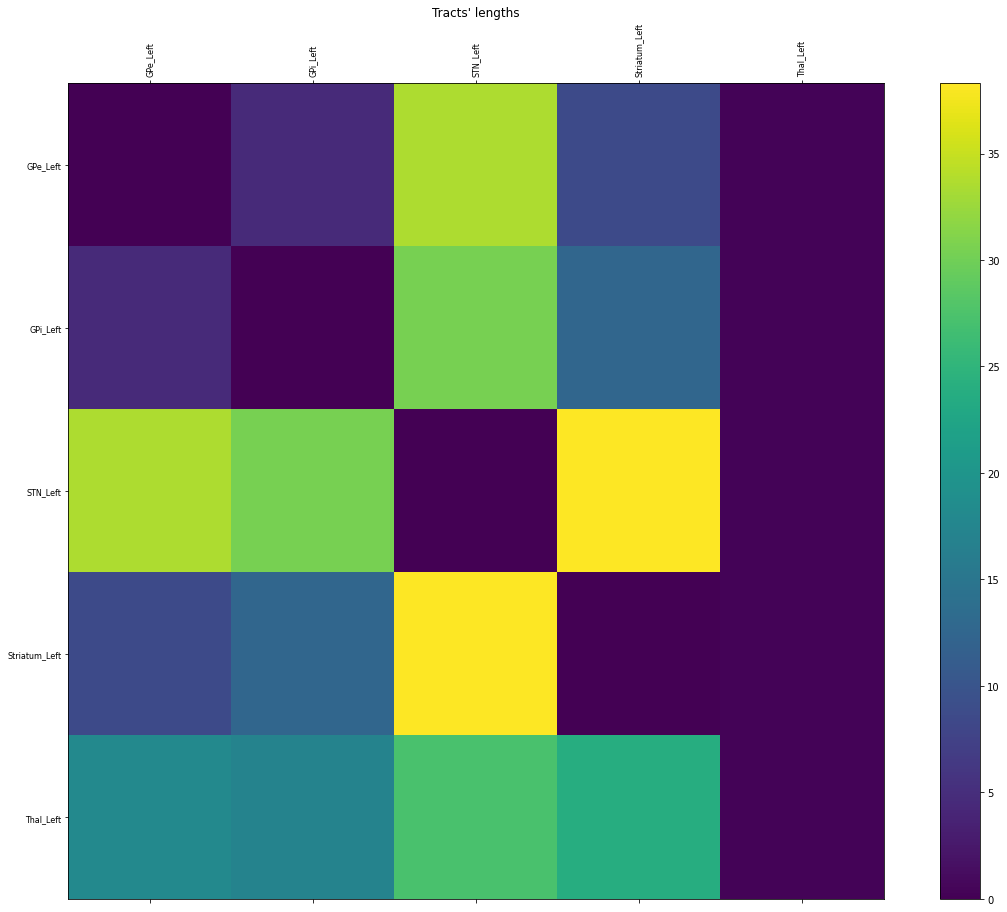

In [14]:
sliceBGnet = slice(0,5)
connTVBleftBG = Connectivity(region_labels=connLeft.region_labels[sliceBGnet], 
                             centres=connLeft.centres[sliceBGnet],
                             weights=connLeft.weights[sliceBGnet][:, sliceBGnet],
                             tract_lengths=connLeft.tract_lengths[sliceBGnet][:, sliceBGnet], 
                            speed=connLeft.speed)
connTVBleftBG.configure()

print("\nLeft BG TVB network:")
plotter.plot_tvb_connectivity(connTVBleftBG);


In [15]:
scaleBGoptTOtvb = np.percentile(BG_opt_matrix_weights, 95) /\
                  np.percentile(connTVBleftBG.weights, 95)
                  
print("Scaling factor of TVB BG network connectome to optimal one = %g" % scaleBGoptTOtvb)


Scaling factor of TVB BG network connectome to optimal one = 0.000705308



Left BG optimized network:


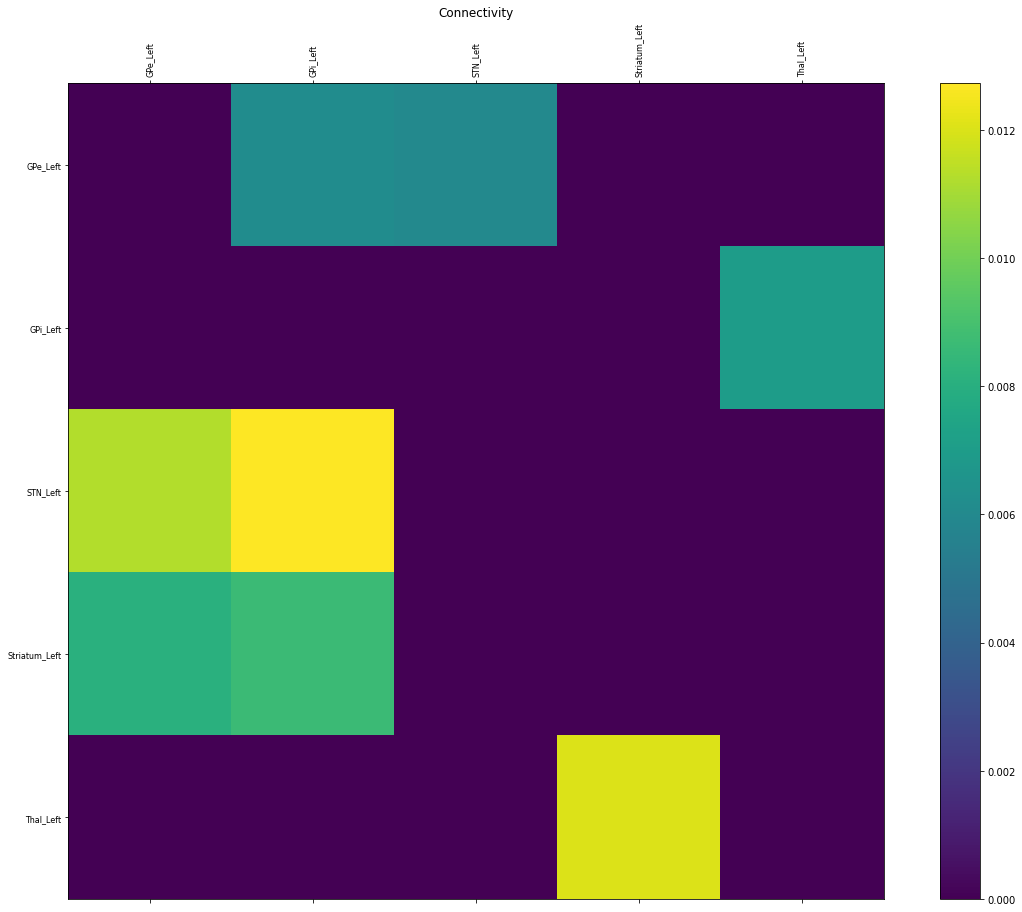

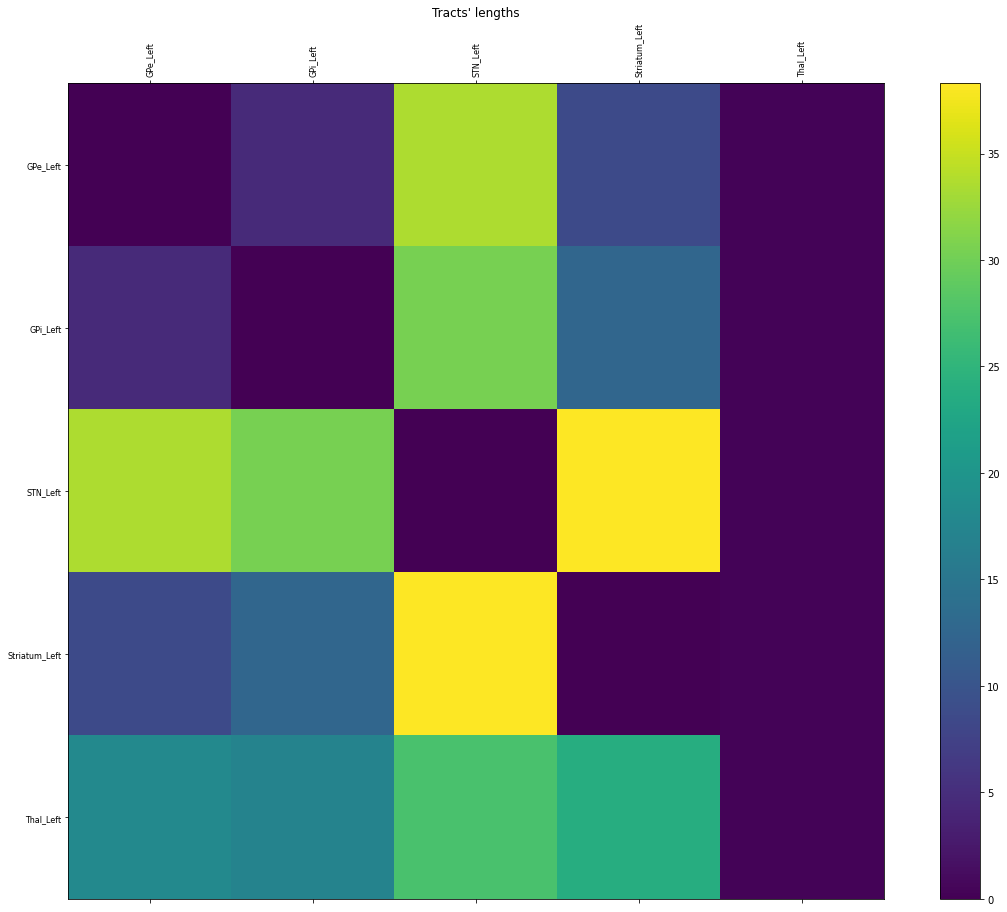

In [16]:
# Construct the final connectivity to use for simulation:
ww = scaleBGoptTOtvb * np.array(connLeft.weights)
ww[sliceBGnet, sliceBGnet] = BG_opt_matrix_weights

connectivity = Connectivity(region_labels=connLeft.region_labels, 
                            centres=connLeft.centres,
                            weights=ww, tract_lengths=connLeft.tract_lengths, 
                            speed=connLeft.speed)
connectivity.configure()

# Construct only the optimized BG connectivity only for plotting:
connBGopt = Connectivity(region_labels=connectivity.region_labels[sliceBGnet], 
                         centres=connectivity.centres[sliceBGnet],
                         weights=connectivity.weights[sliceBGnet][:, sliceBGnet],
                         tract_lengths=connectivity.tract_lengths[sliceBGnet][:, sliceBGnet], 
                         speed=connectivity.speed)
connBGopt.configure()

print("\nLeft BG optimized network:")
plotter.plot_tvb_connectivity(connBGopt);



Connectome used for simulations:


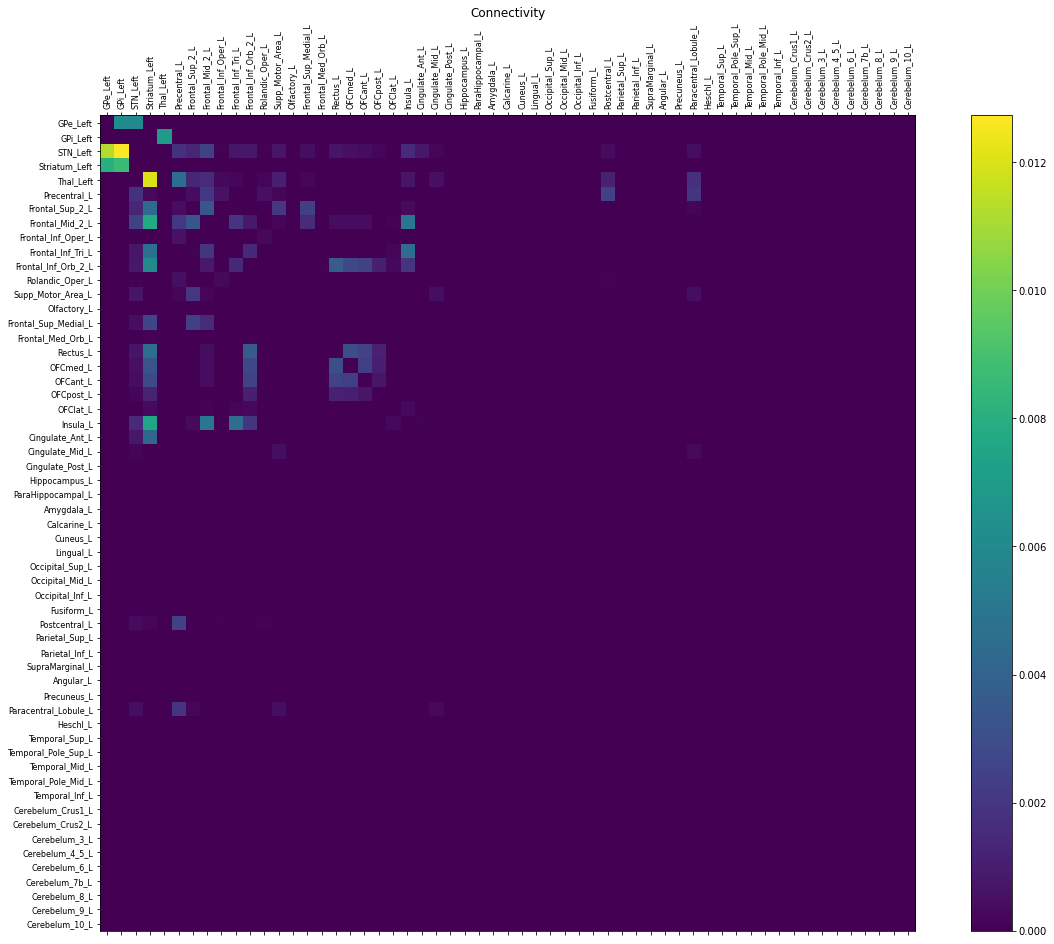

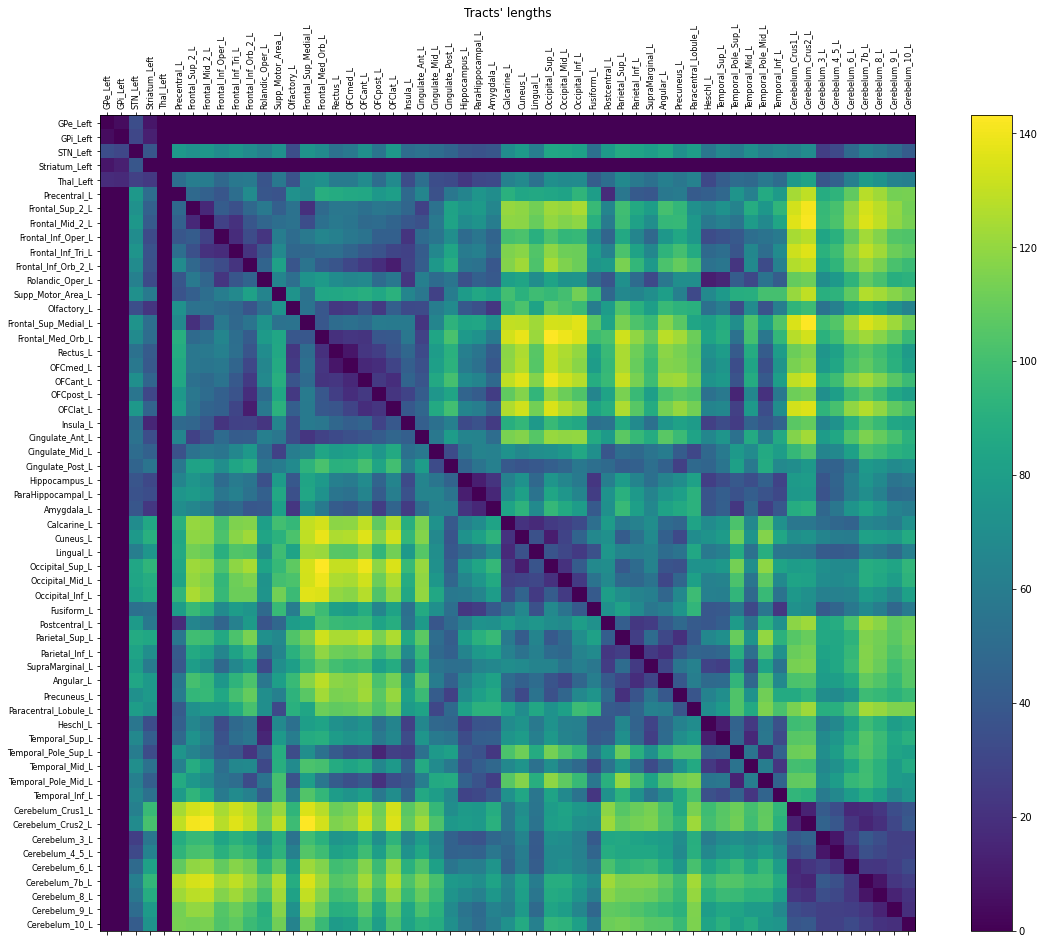

In [17]:
#white_matter_coupling = coupling.Linear(a=0.014)
# Create a TVB simulator and set all desired inputs
# (connectivity, model, surface, stimuli etc)
# We choose all defaults in this example
simulator = CoSimulator()
#simulator.use_numba = False
model_params = {"G": np.array([15.0/scaleBGoptTOtvb])}
simulator.model = ReducedWongWangExcIO(**model_params)

simulator.connectivity = connectivity

simulator.integrator = HeunStochastic()
simulator.integrator.dt = 0.1
simulator.integrator.noise.nsig = np.array([1e-4])  # 1e-5

mon_raw = Raw(period=1.0)  # ms
simulator.monitors = (mon_raw, )

simulator.connectivity.set_idelays(simulator.integrator.dt)
simulator.horizon = simulator.connectivity.idelays.max() + 1

init_cond_filepath = os.path.join(outputs_path, "tvb_init_cond_left.npy")
init_cond = np.load(init_cond_filepath)   # 
init_cond = np.abs(init_cond *(1 + init_cond_jitter * np.random.normal(size=init_cond.shape)))
simulator.initial_conditions = init_cond * np.ones((simulator.horizon,
                                                    simulator.model.nvar,
                                                    simulator.connectivity.number_of_regions,
                                                    simulator.model.number_of_modes))


print("\nConnectome used for simulations:")
plotter.plot_tvb_connectivity(simulator.connectivity);


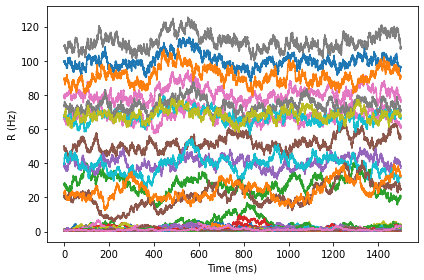

In [98]:
tsR = ts.loc[:, "R"].squeeze()
tsR = tsR.rename({"Time": "Time (ms)"})
tsR.assign_coords({"Region": np.arange(tsR.shape[-1])})
tsR.name = "R (Hz)"
from matplotlib import pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=1)
tsR.plot.line(hue="Region", add_legend=False, ax=ax)
ax.set_title(None)
fig.tight_layout()
fig.savefig(os.path.join(config.figures.FOLDER_FIGURES, "FigureXX.eps"), dpi=1000)

In [90]:
isolated_inds_to = np.where(simulator.connectivity.weights.sum(axis=1) == 0)[0]
print(isolated_inds_to)
print(len(isolated_inds_to))

[24 26 27 28 29 30 31 32 33 34 36 37 38 39 40 42 43 44 45 46 47 48 49 50
 51 52 53 54 55 56]
30


In [91]:
isolated_inds_from = np.where(simulator.connectivity.weights.sum(axis=0) == 0)[0]
print(isolated_inds_from)
print(len(isolated_inds_from))

[24 26 27 28 29 30 31 32 33 34 36 37 38 39 40 42 43 44 45 46 47 48 49 50
 51 52 53 54 55 56]
30


In [92]:
isolated_inds = np.intersect1d(isolated_inds_to, isolated_inds_from)
print(isolated_inds)
print(len(isolated_inds))

[24 26 27 28 29 30 31 32 33 34 36 37 38 39 40 42 43 44 45 46 47 48 49 50
 51 52 53 54 55 56]
30


In [93]:
keep_nodes = np.arange(ts.shape[2]).tolist()
for node in isolated_inds:
    keep_nodes.remove(node)
print(keep_nodes)
print(len(keep_nodes))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 35, 41]
27


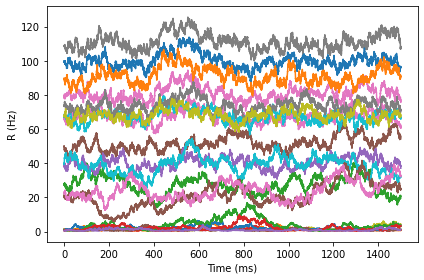

In [99]:
ts_keep = tsR[:, keep_nodes]
fig, ax = plt.subplots(nrows=1, ncols=1)
ts_keep.plot.line(hue="Region", add_legend=False, ax=ax)
ax.set_title(None)
fig.tight_layout()
fig.savefig(os.path.join(config.figures.FOLDER_FIGURES, "FigureXXnoniso.eps"), dpi=1000)